In [2]:
#### IMPORTING LIBRARIES #### 

%matplotlib inline
# Plotting library
import matplotlib.pyplot as plt
# Reading urls library
import urllib
# Stats library
from scipy.stats import bernoulli
from scipy.stats import skew, kurtosis
import scipy 
# Linear algebra and maths libraries
import numpy as np
import math
# RNG library
import random 
# dataframes library 
import pandas as pd
# Networks library
import networkx as nx

import matplotlib as mpl

def setup_mpl():
    mpl.rc("font", size=16)
setup_mpl()

# Question 1

Introduction <br>
(a) Download and install a programming interface of your choice, ideally Matlab or Python notebooks. See http://www.maths.ox.ac.uk/members/it/software-personal-machines/matlab and
http://jupyter.org/install.html <br>
(b) Practice with Matlab. For example, you could go through parts of a tutorial available at http://www.
tutorialspoint.com/matlab/ or http://www.tutorialspoint.com/python/. There are also numerous
other resources for learning Matlab available online. In your homework submission, indicate what practice
and tutorials you have done. Cite all references explicitly.<br>
(c) For Matlab, download the Brain Connectivity Toolbox from https://sites.google.com/site/bctnet/.
If you use Python, download NetworkX from https://networkx.github.io/. This is one of many such
sources available online.<br>
(d) Download data for at least two small unweighted, undirected networks of somewhat different sizes from
http://konect.cc/ and have a look at the data format. Import the graph by using the library of your
choice (networkX, etc.).<br>
(e) Using some software, draw visualisations of these networks. Possibilities include visone and Gephi.<br>
(f) Plot the degree distribution for each of the two networks that you downloaded. What are you able to
conclude from these degree distributions?

In [3]:
### NETWORK 1: FROM INTERNET ###

#download USA state adjacency data
with urllib.request.urlopen('https://www-cs-faculty.stanford.edu/~knuth/contiguous-usa.dat') as response:
    contiguous_bytes = response.read()

# Preprocessing: decode from byte type to utf-8 string type
contiguous = contiguous_bytes.decode("utf-8") 

In [4]:
# BUILD NETWORK
# construct edgelist as tuples for contiguous USA states
contiguous_edges = [tuple(e.split(' ')) for e in contiguous.split('\n') if len(e.split(' ')) == 2]
# Build network from edges
G_contiguous = nx.Graph( contiguous_edges )


### NETWORK 2: Integrated in the python library ###


#load karate club network
G_karate = nx.karate_club_graph()

In [5]:
#### VISUALISATION ###

#Node positions using kamada kawai algorithm
pos_cont = nx.kamada_kawai_layout(G_contiguous)
pos_karate = nx.layout.kamada_kawai_layout(G_karate)

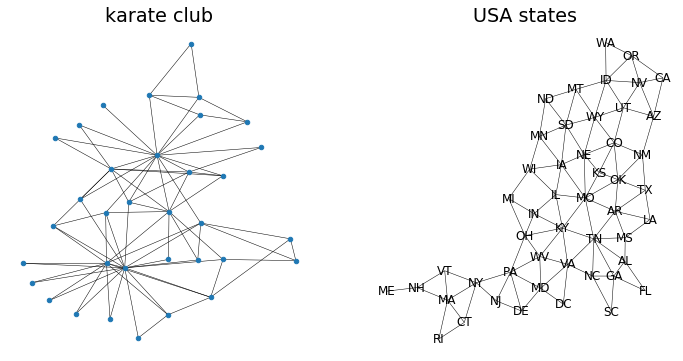

In [69]:
# Plot networks side by side
# Initialise canvas
plt.figure(figsize=(12,6))
# First subplot (for karate club network)
plt.subplot(121)
plt.title('karate club')
nx.draw(G_karate, pos = pos_karate, node_size = 20, width = 0.5)
# Second subplot (for karate club network)
plt.subplot(122)
plt.title('USA states')
nx.draw(G_contiguous, pos=pos_cont, with_labels=True, node_size = 0, width = 0.5)
plt.show()


In [10]:
df = pd.read_table("./data/10cityGCs.txt", header=None)

In [11]:
df.columns = columns=["city", "node1", "node2"]
display(df.head())

print("There are {} edges in the network".format(df.shape[0]))

,city,node1,node2
0,1,1,347
1,1,1,471
2,1,2,745
3,1,2,812
4,1,2,1114


There are 137414 edges in the network


There are 48532 edges in London


/Users/lmng/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


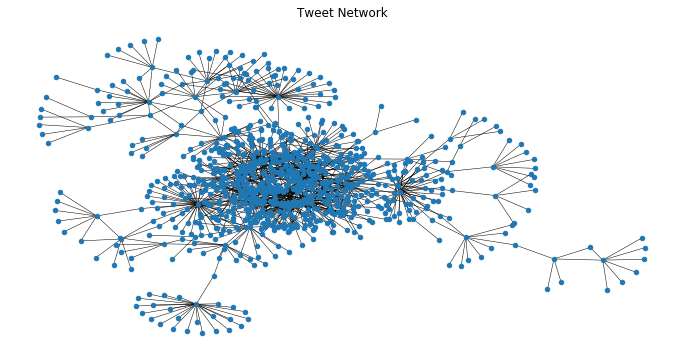

In [12]:
# Filter for London
df = df.loc[df.city == 10]

print("There are {} edges in London".format(df.shape[0]))

df = df.iloc[:1_000, :]

# Creating graph
G_tweet = nx.Graph()

for idx, row in df.iterrows():
    G_tweet.add_edge(row["node1"], row["node2"])
    
#Node positions using kamada kawai algorithm
pos_tweet = nx.kamada_kawai_layout(G_tweet)

# Plot networks side by side
# Initialise canvas
plt.figure(figsize=(12,6))
plt.title('Tweet Network')
nx.draw(G_tweet, pos = pos_tweet, node_size = 20, width = 0.5)
# Second subplot (for karate club network)
plt.show()

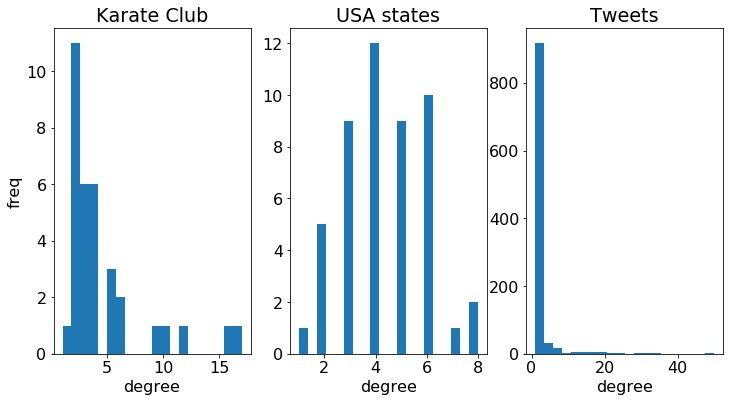

In [71]:
## Degree distributions 

# networkx has a built-in function to get the degree of each node. 
# G.degree() returns a dictionary of the node labels with their degree.
G_karate_deg_dist = G_karate.degree()
G_cont_deg_dist   = G_contiguous.degree()
G_tweet_deg_dist   = G_tweet.degree()

## Visualise degree distribution
# canvas
fig, ax = plt.subplots(1, 3, figsize=(12,6))
# subplot for Karate
# Plot a histogram of the given values
ax[0].hist( dict(G_karate_deg_dist).values(), bins=20 ) 
ax[0].set_title('Karate Club')
ax[0].set_xlabel('degree')
ax[0].set_ylabel('freq')
# subplot for USA states
ax[1].hist( dict(G_cont_deg_dist).values(), bins=20)
ax[1].set_title('USA states')
ax[1].set_xlabel('degree')
# subplot for tweet data
ax[2].hist( dict(G_tweet_deg_dist).values(), bins=20)
ax[2].set_title('Tweets')
ax[2].set_xlabel('degree')
plt.show()

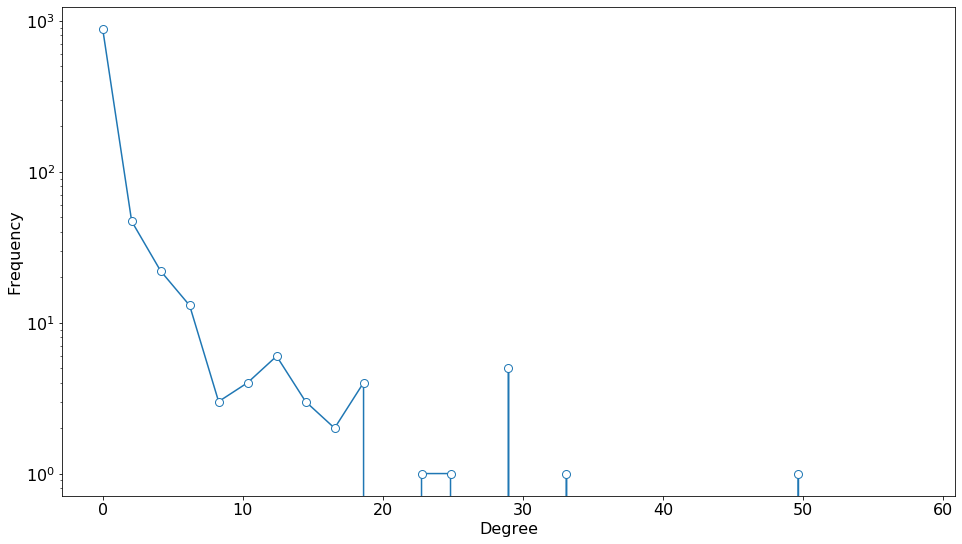

In [73]:
# Let's try to plot the tweet network deg dist in log scale
degree_dist = np.array([val for val in dict(G_tweet_deg_dist).values()])

bins = np.linspace(0, 60, 30)
hist, bins = np.histogram(degree_dist, bins = bins)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(bins[:-1], hist, marker = "o", mfc="white", markersize=8)
ax.set_yscale("log")
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency")
plt.show()

# Question 2

2. Mathematical toolbox. <br>
(a) Ex.III.1 : Using the computer language of your choice, calculate the mean and variance of a Bernouilli
process, as a function of p.<br>
(b) Ex.III.4 : Take a RW on a discrete one-dimensional line. Assuming that the walker has, at each step, a
probability 1/2 to go to the left and 1/2 to go to the right. Explore by numerical simulations how the
probability distribution evolves over time, and verify the accuracy of Eq.(45). Provide a simple metric to
test the “Gaussianity” of the distribution.<br>
(c) Ex.III.8 : Calculate numerically the distribution of eigenvalues of a random symmetric matrix A of size 1000,
where each entry is an independent Bernouilli random variable, subject to the constraint that Aij = Aji
to ensure symmetry. Describe your observations.

## a) Bernoulli trials

For a Bernoulli process with a success probability $p$, we know that the **mean** and **variance** go as
\begin{align}
    \mathbb{E}[X] &= p , \\
    Var[X] &= p(1-p) .\\
\end{align}

In [28]:
### SIMULATIONS ###

# Take 20 values between 0 and 1
probabilities = np.linspace(0,1,20).reshape((-1,1))

# Create a 20*n_trials array with random numbers between 0 and 1
simulations = np.random.random(size = (probabilities.shape[0], 10_000))

# For each row, if the number is < than the corresponding p assign True, else assign False
simulations  = simulations < probabilities

# Store mean and variance
means = simulations.mean(axis = 1)
variances = simulations.var(axis = 1)

Text(0, 0.5, 'Variance')

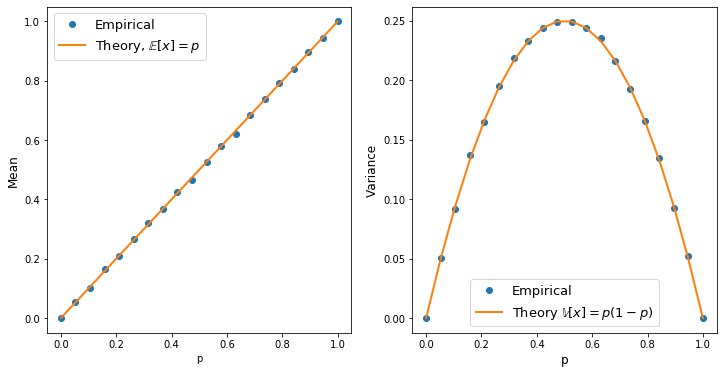

In [29]:
### VISUALISATION ###

# Canvas
plt.figure(figsize=(12,6))

# Plot for the mean
plt.subplot(121)
plt.plot(probabilities, means, 'o', label='Empirical')
plt.plot(probabilities, probabilities, lw=2, label=r'Theory, $\mathbb{E}[x]=p$')

plt.legend(fontsize=13)
plt.xlabel('p')
plt.ylabel('Mean', fontsize=12)

plt.subplot(122)
plt.plot(probabilities, variances, 'o', label='Empirical')
plt.plot(probabilities, probabilities*(1-probabilities), lw=2, label=r'Theory $\mathbb{V}[x]=p(1-p)$')
plt.legend(fontsize=13)
plt.xlabel('p', fontsize=12)
plt.ylabel('Variance', fontsize=12)

## b) Random walkers
From the notes (see Eq. (45), which, actually, has a small mistake in the $4Dt$ term), we know that the asymptotic behaviour of the random walk converges to the Gaussian distribution
\begin{equation}
    p(x;t) = \frac{1}{\sqrt{2\pi Dt}} \exp{ \Big( \frac{(x - vt)^2}{2Dt} } \Big) \ ,
\end{equation}
with a variance growing linearly with time. The value $v$ relates to the *drift* of the walker (i.e. when $p_{right} \neq p_{left}$), and $D$ relates to the size of the step that the walker takes.

The random walker seen in class takes a step of size 1 with equal probability; hence $v= 0$ and $D=1$. 

In [131]:
### FUNCTIONS CODING ### 

def random_walks(num_walkers, Tmax):
    # each row is a random walk direction +- 1, each column is a time step
    walkers_decisions = np.random.choice(a = [1,-1], size=(num_walkers, Tmax), replace=True)

    # sum over +- 1 across row to get position 
    walkers_paths = np.cumsum(walkers_decisions, axis=1)
    
    return walkers_paths

In [134]:
### SIMULATION ### 
num_walkers = 2000
Tmax = 500

walkers_paths = random_walks(num_walkers, Tmax)

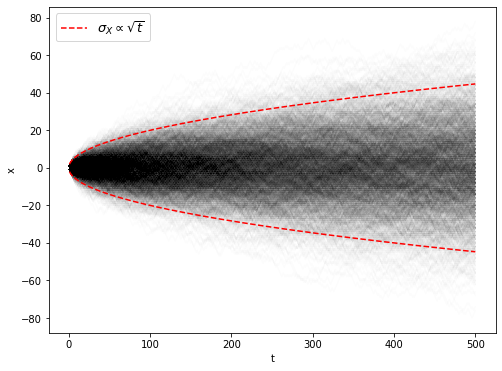

In [136]:
## VISUALIZATION ## 

plt.figure( figsize=(8,6) )

# time (x-axis)
t = np.arange(1, Tmax+1)

# Plot the trajectory of each walker
for i in range(num_walkers):
    plt.plot(t, walkers_paths[i], 'k-', alpha=0.01)

# Plot theoretical standard deviation
plt.plot(t, 2*np.sqrt(t), 'r--', label=r'$\sigma_X \propto \sqrt{t}$')
plt.plot(t, -2*np.sqrt(t), 'r--')

plt.xlabel('t')
plt.ylabel('x')
plt.legend(fontsize=13)

### Testing Gaussianity 

##### By inspection

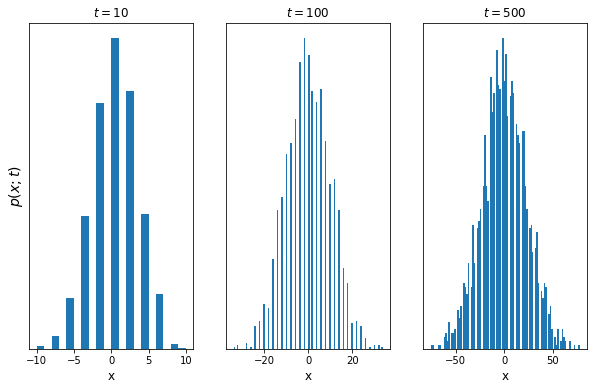

In [394]:
plt.figure( figsize=(10,6) )

plt.subplot(131)
plt.ylabel('$p(x; t)$', size=14)

plt.hist(walkers_paths[:,9], bins=20)
plt.title('$t = 10$', size=12)
plt.xlabel('x', size=12)
plt.yticks([])


plt.subplot(132)
plt.hist(walkers_paths[:,99], bins=100)
plt.title('$t = 100$', size=12)
plt.xlabel('x', size=12)
plt.yticks([])

plt.subplot(133)
plt.hist(walkers_paths[:,-1], bins=100)
plt.title('$t = 500$', size=12)
plt.xlabel('x', size=12)
plt.yticks([]);

##### By excess of kurtosis and skew
A Gaussian distribution has a well defined mean and variance but has zero *kurtosis* (In general, it has zero high-order moments), so a simple way to test Gaussianity on an empirical distribution is to see how close the kurtosis is to zero.  

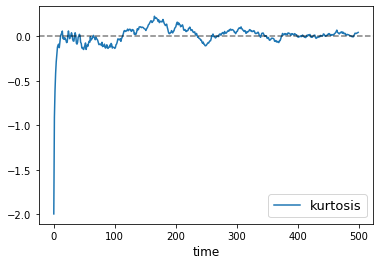

In [204]:
### COMPUTATION ### 
walker_dist_kurtosis = kurtosis(walkers_paths, axis=0)

### VISUALISATION ###

plt.plot(walker_dist_kurtosis, label='kurtosis')
plt.axhline([0], c='black', ls='--', alpha=0.5) # horizontal line at 0

plt.xlabel('time', size=12)
plt.legend(fontsize=13)

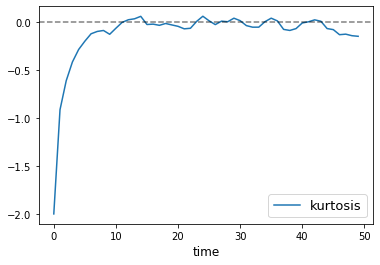

In [206]:
### VISUALISATION ZOOM IN ###

plt.plot(walker_dist_kurtosis[:50], label='kurtosis')
plt.axhline([0], c='black', ls='--', alpha=0.5) # horizontal line at 0


plt.xlabel('time', size=12)
plt.legend(fontsize=13)

## Eigenvalue distribution

In [432]:
## FUNCTIONS CODING ##
def bernoulli_matrix(p, matrix_size):
    
    matrix_entries = bernoulli.rvs(p, size=int(N*(N+1)/2))
     
    bernoulli_mat = np.zeros((N, N))
    # Symmetry constrain
    tri[np.triu_indices(N, 0)] = matrix_entries
    
    # Polute matrix with the upper and triangular copies of the amtrix
    A = tri + tri.T - np.diag(np.diag(tri))
    
    return A#/np.sqrt(matrix_size)

In [442]:
## SIMULATIONS ##

N = 1000
p = 0.5
A = bernoulli_matrix(p, N)

eigenvals = np.linalg.eigvals( A )

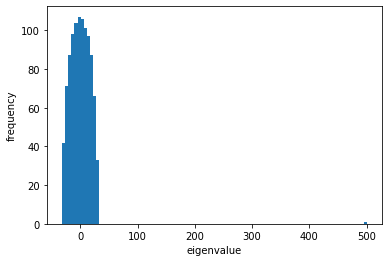

In [443]:
### VISUALISATION ## 

plt.hist (eigenvals, bins = 100)

plt.xlabel("eigenvalue")
plt.ylabel("frequency");

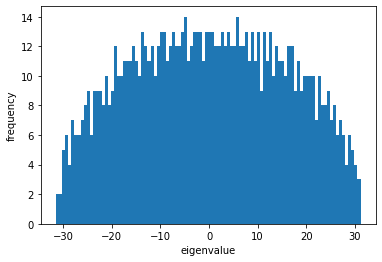

In [444]:
### VISUALISATION ZOOM IN ## 

plt.hist (eigenvals[1:], bins = 100)

plt.xlabel("eigenvalue")
plt.ylabel("frequency");

We observe what is called as the **Wigner semicircle distribution**: All eigenvalues except the largest are distributed in a semicircle spanning from -1 to 1. The largest eigenvalue is well separated from the semicircle. 

# Question 6: Centrality Measures
Quick recap of the several node centralities for, say, node $i$.

- **degree**: number of edges coming from node $i$.
- **closeness**: inverse of mean distance from node $i$ to any other node.
- **betweeness**: fraction of shortest paths going through $i$.
- **katz**: weighted sum of the $k$-paths from $i$: $\sum_j \big[ I + \alpha A + \alpha^2 A^2 + \dots \big]_{ij}$
- **pagerank**: stationary density of walkers. Node $i$ is important if it receives connections from many important nodes.

6. Centrality measures.
(a) Ex.IV.5 : Take an undirected network and measure the correlation between different centrality measures.
The correlation can either be estimated with the centrality values (Pearson) or with their associated
ranking (Kendall). Construct an example of a graph where one node has a small degree centrality but a
high betweenness centrality

In [382]:
## READING SOME GRAPH ##
G_karate = nx.karate_club_graph()

In [419]:
## COMPUTING CENTRALITIES ## 
centralities = pd.DataFrame()

centralities['closeness'] = nx.closeness_centrality(G_karate).values()
centralities['betweeness'] = nx.betweenness_centrality(G_karate).values()
centralities['katz'] = nx.katz_centrality_numpy(G_karate).values()
centralities['degree'] = nx.degree_centrality(G_karate).values()
centralities['pagerank'] = nx.pagerank(G_karate).values()

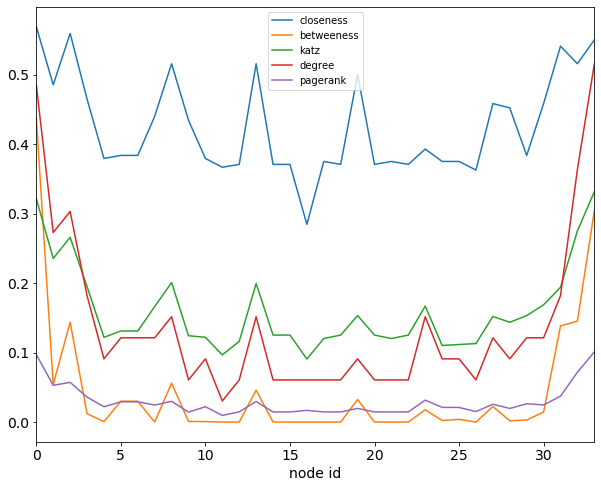

In [447]:
centralities.plot( figsize=(10,8), fontsize=14 )
plt.xlabel("node id", size=14);

In [448]:
## CORRELATIONS PEARSON ## 
centralities.corr(method='pearson')

,closeness,betweeness,katz,degree,pagerank
closeness,1.000000,0.717945,0.877428,0.771591,0.742256
betweeness,0.717945,1.000000,0.865582,0.914643,0.923134
katz,0.877428,0.865582,1.000000,0.966511,0.950065
degree,0.771591,0.914643,0.966511,1.000000,0.997903
pagerank,0.742256,0.923134,0.950065,0.997903,1.000000


In [449]:
## CORRELATIONS KENDALL (BY RANK) ## 
centralities.corr(method='kendall')

,closeness,betweeness,katz,degree,pagerank
closeness,1.000000,0.772460,0.739474,0.786266,0.674148
betweeness,0.772460,1.000000,0.635014,0.809734,0.736114
katz,0.739474,0.635014,1.000000,0.753666,0.608380
degree,0.786266,0.809734,0.753666,1.000000,0.928070
pagerank,0.674148,0.736114,0.608380,0.928070,1.000000
